In [38]:
library(ggplot2)
library(viridis)
library(ggpubr)  # 用于添加统计学检验结果
library(scales)
library(dplyr)
library(ggsignif)
library(tidyr)
library(ggalluvial)

In [ ]:
mutation=read.table("256sample_mutation_paired_clinical_filter_adjust.csv",sep=",",quote="\"",header=T)
haplogroup=read.table("Haplogroup/Wuqiao_MT_typing.csv",sep=",",quote="\"",header=T)
haplogroup_new=read.table("Haplogroup/adjacent_tumor_haplogroup_class.csv",sep=",",quote="\"",header=T)

In [4]:
haplogroup_rename=merge(haplogroup[,1:2],haplogroup_new,by.x=2,by.y=1)

In [8]:
mutation_haplogroup=unique(merge(mutation,haplogroup_rename[,2:3],by.x=2,by.y=1))

In [ ]:
tumor_adjacent_counts = mutation_haplogroup %>%
  group_by(Haplogroup_new, class,Sample) %>% 
  summarise(sample_count = n(), .groups = "drop") 

Warning message:
“There were 14 warnings in `summarise()`.
The first warning was:
ℹ In argument: `p_value = tryCatch(wilcox.test(sample_count ~ class)$p.value,
  error = function(e) NA)`.
ℹ In group 1: `Haplogroup_new = "A"`.
Caused by warning in `wilcox.test.default()`:
! cannot compute exact p-value with ties
ℹ Run `dplyr::last_dplyr_warnings()` to see the 13 remaining warnings.”


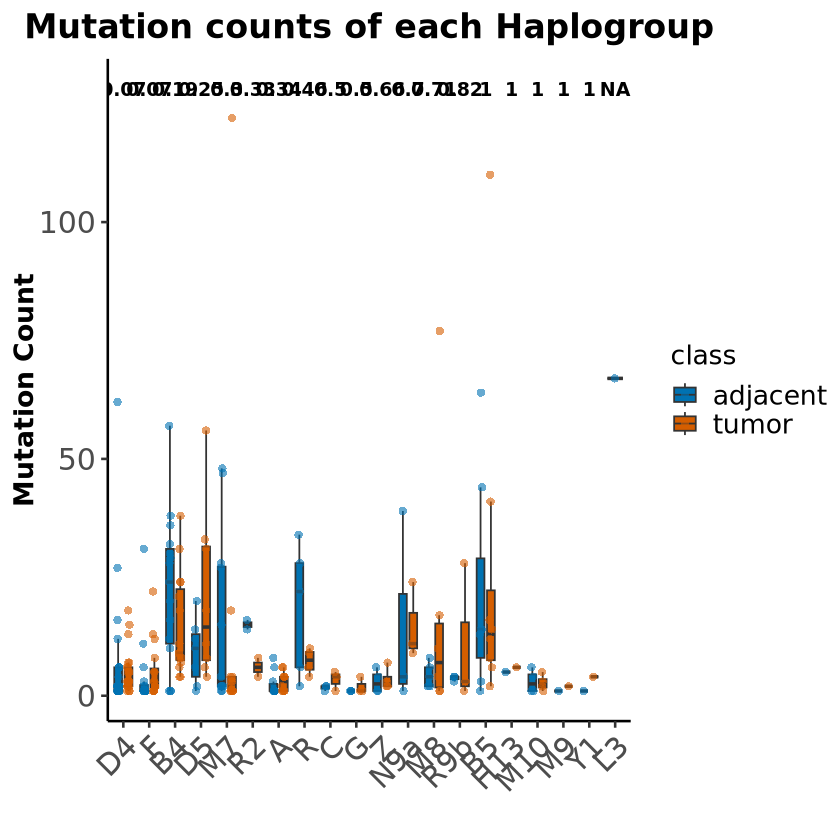

In [ ]:
custom_colors <- c("adjacent" = "#0072B2", "tumor" = "#D55E00")
tumor_adjacent_counts$class <- as.factor(tumor_adjacent_counts$class)

p_value <- tumor_adjacent_counts %>%
  group_by(Haplogroup_new) %>%
  summarise(
   p_value = tryCatch(
   wilcox.test(sample_count ~ class)$p.value,
    error = function(e) NA  
   )
  ) %>%
arrange(p_value)  

tumor_adjacent_counts$Haplogroup_new <- factor(tumor_adjacent_counts$Haplogroup_new, levels = p_value$Haplogroup_new)

p_value_labels <- paste0("", round(p_value$p_value, 2))

p <- ggplot(tumor_adjacent_counts, aes(x = Haplogroup_new, y = sample_count, fill = class)) +
  geom_boxplot(outlier.shape = NA, width = 0.6, position = position_dodge(0.8)) +
  geom_jitter(aes(color = class), size = 2, alpha = 0.6, shape = 16,
              position = position_jitterdodge(jitter.width = 0.2)) +
  scale_fill_manual(values = custom_colors) +
  scale_color_manual(values = custom_colors) +
  theme_classic(base_size = 16) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 18),
    axis.text.y = element_text(size = 18),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16,face = "bold"),
    legend.title = element_text(size = 16),
    legend.text = element_text(size = 16),
    plot.title = element_text(hjust = 0.5, face = "bold", size = 20)
  ) +
  labs(title = "Mutation counts of each Haplogroup",
       x = "",
       y = "Mutation Count")

for (i in 1:nrow(p_value)) {
  p <- p + annotate("text", 
                    x = i, 
                    y = max(tumor_adjacent_counts$sample_count) * 1.05, 
                    label = p_value_labels[i], 
                    size = 4, fontface = "bold", hjust = 0.5)
}

print(p)

In [ ]:
mutation_summary <- mutation_haplogroup %>%
  filter(!is.na(Mutation.Class) & Mutation.Class != "") %>%  
  group_by(Haplogroup_new, class, Mutation.Class) %>%
  summarise(count = n(), .groups = "drop")  

In [ ]:
p=ggplot(mutation_summary, aes(x = Haplogroup_new, y = count, fill = Mutation.Class)) +
  geom_bar(stat = "identity", position = "fill") + 
  facet_wrap(~ class) + 
  labs(title = "Mutation Class Distribution by Haplogroup and Class",
       x = "Haplogroup",
       y = "Percentage") +
  scale_y_continuous(labels = percent_format()) +  
  theme_minimal(base_size = 16) + 
  theme(
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank(), 
    axis.title.x = element_text(size = 18),  
    axis.title.y = element_text(size = 18),  
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14), 
    axis.text.y = element_text(size = 14),  
    axis.line = element_line(size = 0.5, colour = "black"),  
    axis.ticks = element_line(size = 0.5, colour = "black")  
  ) +
  scale_fill_manual(values = c("#406443","#A4A77C","#D2AFD6","#DD7CAC"))  

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


In [ ]:

mutation_summary_exon <- mutation_haplogroup %>%
  filter(!is.na(ExonicFunc.MT_ensGene) & ExonicFunc.MT_ensGene != "") %>%  
  group_by(Haplogroup_new, class, ExonicFunc.MT_ensGene) %>%
  summarise(count = n(), .groups = "drop") 

In [ ]:
p=ggplot(mutation_summary_exon, aes(x = Haplogroup_new, y = count, fill = ExonicFunc.MT_ensGene)) +
  geom_bar(stat = "identity", position = "fill") + 
  facet_wrap(~ class) +  
  labs(title = "Mutation Class Distribution by Haplogroup and Class",
       x = "Haplogroup",
       y = "Percentage") +
  scale_y_continuous(labels = percent_format()) +  
  theme_minimal(base_size = 16) +  
  theme(
    panel.grid.major = element_blank(),  
    panel.grid.minor = element_blank(), 
    axis.title.x = element_text(size = 18), 
    axis.title.y = element_text(size = 18),  
    axis.text.x = element_text(angle = 45, hjust = 1, size = 14),  
    axis.text.y = element_text(size = 14),  
    axis.line = element_line(size = 0.5, colour = "black"),  
    axis.ticks = element_line(size = 0.5, colour = "black")  
  ) +
  scale_fill_manual(values = c("#E64B35","#4DBBD5","#00A087","#3C5488","#F39B7F","#8491B4","#91D1C2"))  # 另一组 Nature 配色

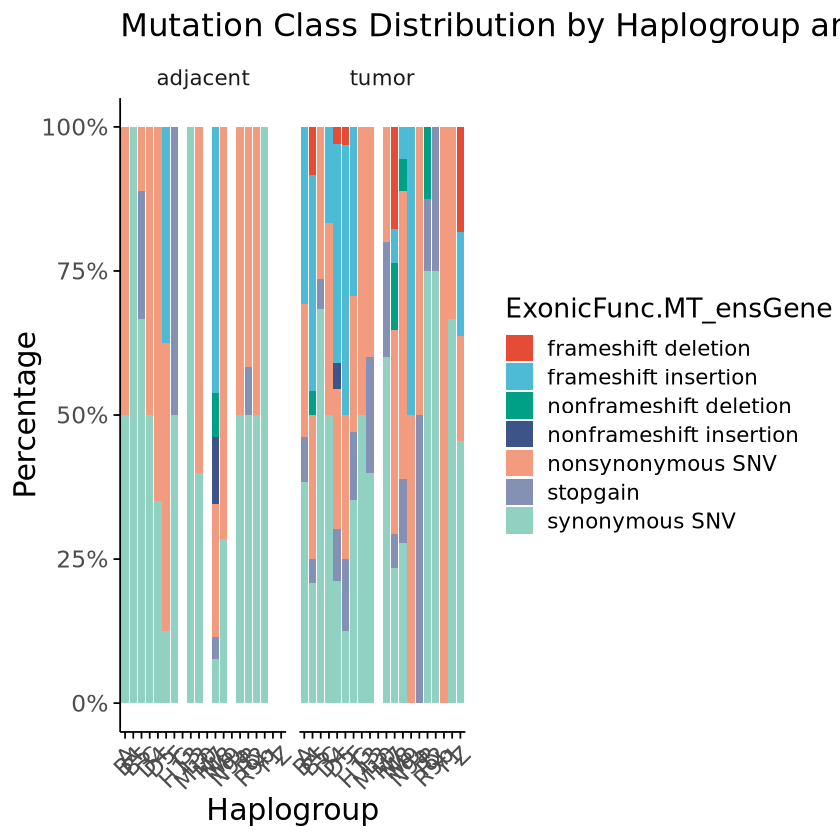

In [27]:
p

In [ ]:
df0 <- mutation_haplogroup %>%
  filter(class == "tumor")

df <- df0 %>%
  select(Haplogroup_new, gender, age, tumor.diameter, membrane.invasion,
         surrounding.invasion, center.lymph, center.metastasis, 
         T.stage, N.stage, BRAF.V600E) %>%
  distinct()


In [ ]:

cut_quantile <- function(x, probs = c(0, 0.25, 0.5, 0.75, 1)) {
  x_num <- as.numeric(x)


  qs <- quantile(x_num, probs = probs, na.rm = TRUE)
  
  if (any(diff(qs) == 0)) {
    qs <- unique(qs)  
  }

  labels <- c()
  for (i in seq_along(qs)[-length(qs)]) {
    labels[i] <- paste0("[", round(qs[i], 2), ", ", round(qs[i + 1], 2), "]")
  }

  cut(x_num, breaks = qs, labels = labels, include.lowest = TRUE, right = TRUE)
}



In [ ]:

df <- df %>%
  mutate(
    age = as.numeric(age),  
    tumor_diameter = as.numeric(tumor.diameter),
    center_lymph = as.numeric(center.lymph)
  )
df <- df %>%
  mutate(
    age = cut_quantile(age, probs = c(0, 0.25, 0.5, 0.75, 1)), 
    tumor_diameter = cut_quantile(tumor_diameter, probs = c(0, 0.25, 0.5, 0.75, 1)),
    center_lymph = cut_quantile(center_lymph, probs = c(0, 0.25, 0.5, 0.75, 1))
  )

In [ ]:

cont_varsed <- c("age", "tumor_diameter",
                       "center_lymph")

In [ ]:

base_nature <- c("#32865dff","#4DBBD5","#00A087","#3C5488",
                 "#F39B7F","#8491B4","#91D1C2","#954b4bff",
                 "#7E6148","#B09C85","#FFDB6D","#374E55",
                 "#F97306","#A73030")
hap_unique <- sort(unique(df$Haplogroup_new))
n_hap <- length(hap_unique)
if (n_hap <= length(base_nature)) {
  hap_colors <- setNames(base_nature[1:n_hap], hap_unique)
} else {
  hap_colors <- setNames(colorRampPalette(base_nature)(n_hap), hap_unique)
}


In [ ]:

var_base_pairs <- list(
  age= c("#FFF5F0", "#de6e72ff"),                
  tumor_diameter= c("#F7FCF5", "#006D2C"),   
  center_lymph= c("#FFF7FB", "#6A51A3")      
)
default_pair <- c("#F2F2F2", "#08519C")


In [ ]:

sankey_cont <- df %>%
  select(Haplogroup_new, all_of(cont_varsed)) %>%
  pivot_longer(-Haplogroup_new, names_to = "variable", values_to = "value") %>%
  filter(!is.na(value)) %>%
  mutate(node_label = paste(variable, value, sep = ": ")) %>%
  group_by(Haplogroup_new, variable, node_label) %>%
  summarise(n = n(), .groups = "drop")  


In [ ]:

library(stringr)
extract_min_val <- function(val_str) {

  nums <- str_extract_all(val_str, "-?\\d+\\.?\\d*")[[1]]
  if(length(nums)==0) return(Inf)
  min(as.numeric(nums), na.rm = TRUE)
}

node_order_df <- sankey_cont %>%
  distinct(variable, node_label) %>%
  mutate(min_val = sapply(sub("^[^:]+: ?", "", node_label), extract_min_val)) %>%
  mutate(variable = factor(variable, levels = cont_varsed)) %>%
  arrange(variable, min_val)

right_nodes_sorted <- node_order_df$node_label
sankey_cont <- sankey_cont %>%
  mutate(node_label = factor(node_label, levels = right_nodes_sorted))


In [ ]:

sankey_cont <- sankey_cont %>%
  mutate(node_label = factor(node_label, levels = right_nodes_sorted))

right_colors <- unlist(lapply(cont_varsed, function(var) {
  nodes_var <- node_order_df %>% filter(variable == var) %>% pull(node_label)
  n_nodes <- length(nodes_var)
  pair <- var_base_pairs[[var]]
  pal <- colorRampPalette(pair)(n_nodes)
  setNames(pal, nodes_var)
}), use.names = TRUE)

all_colors <- c(hap_colors, right_colors)

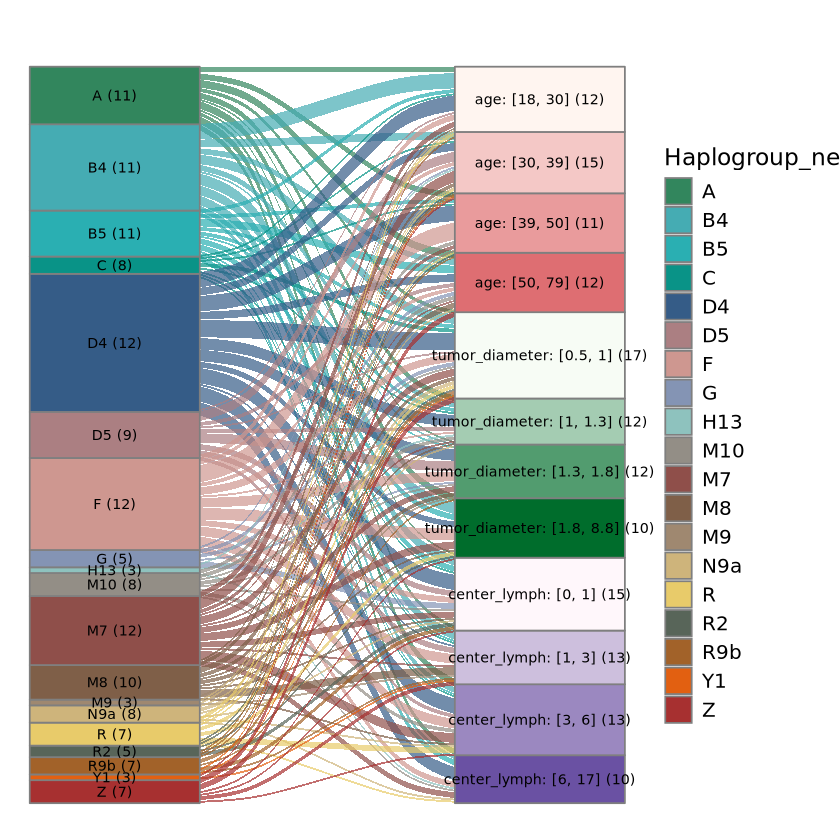

In [ ]:

p_cont <- ggplot(sankey_cont,
                 aes(axis1 = Haplogroup_new, axis2 = node_label, y = n)) +
  geom_alluvium(aes(fill = Haplogroup_new), alpha = 0.7) +
  geom_stratum(aes(fill = after_stat(stratum)), color = "grey50",
               width = 0.4) +  
  geom_text(stat = "stratum", 
            aes(label = paste(after_stat(stratum), " (", n, ")", sep = "")), 
            size = 3) +  
  scale_fill_manual(values = all_colors,
                    breaks = names(hap_colors), 
                    guide = guide_legend(order = 1)) +
  theme_void() +
  theme(legend.position = "right",
        legend.text = element_text(size = 12),  
        legend.title = element_text(size = 14),  
        plot.title = element_text(hjust = 0.5)) +
  labs(title = "")

print(p_cont)

In [ ]:

cat_vars <- c("gender", "membrane.invasion", "surrounding.invasion", 
              "center.metastasis", "T.stage", "N.stage", "BRAF.V600E")

In [ ]:

sankey_cat <- df %>%
  select(Haplogroup_new, all_of(cat_vars)) %>%
  mutate(across(everything(), as.character)) %>%
  pivot_longer(-Haplogroup_new, names_to = "variable", values_to = "value") %>%
  filter(!is.na(value)) %>%
  mutate(node_label = paste(variable, value, sep = ": ")) %>%
  mutate(node_label = factor(node_label, levels = c(
      "BRAF.V600E: 0", "BRAF.V600E: 1", 
      "N.stage: N0", "N.stage: N1", 
      "T.stage: T1_T2", "T.stage: T3_T4", 
      "center.metastasis: 0", "center.metastasis: 1", 
      "membrane.invasion: 0", "membrane.invasion: 1", 
      "surrounding.invasion: 0", "surrounding.invasion: 1", 
      "gender: female", "gender: male"
  ))) %>%
  group_by(Haplogroup_new, variable, node_label) %>%
  summarise(n = n(), .groups = "drop")

In [ ]:
node_order_cat <- sankey_cat %>%
  distinct(variable, node_label) %>%
  mutate(variable = factor(variable, levels = cat_vars)) %>%
  arrange(variable)

right_nodes_sorted_cat <- node_order_cat$node_label
sankey_cat <- sankey_cat %>%
  mutate(node_label = factor(node_label, levels = right_nodes_sorted_cat))

In [ ]:

base_nature <- c("#32865dff","#4DBBD5","#00A087","#3C5488",
                 "#F39B7F","#8491B4","#91D1C2","#954b4bff",
                 "#7E6148","#B09C85","#FFDB6D","#374E55",
                 "#F97306","#A73030")
hap_unique <- sort(unique(df$Haplogroup_new))
n_hap <- length(hap_unique)
if (n_hap <= length(base_nature)) {
  hap_colors <- setNames(base_nature[1:n_hap], hap_unique)
} else {
  hap_colors <- setNames(colorRampPalette(base_nature)(n_hap), hap_unique)
}

In [ ]:

var_base_pairs_cat <- list(
  gender = c("#ad7094ff", "#9a2168ff"),               
  membrane.invasion = c("#E0F3DB", "#006D2C"),    
  surrounding.invasion = c("#8a81a1ff", "#6A51A3"),  
  center.metastasis = c("#a99b8eff", "#c8711fff"),  
  T.stage = c("#a58287ff", "#912f3cff"),                
  N.stage = c("#84a792ff", "#2dac60ff"),                
  BRAF.V600E = c("#B9EEF2","#0FD2F2")            
)


right_colors_cat <- unlist(lapply(cat_vars, function(var) {
  nodes_var <- node_order_cat %>% filter(variable == var) %>% pull(node_label)
  n_nodes <- length(nodes_var)
  pair <- var_base_pairs_cat[[var]]
  

  if (length(pair) < 2 || any(is.na(pair))) {
    warning(paste("Invalid color pair for variable:", var))
    return(rep(NA, n_nodes))  
  }
  
  pal <- colorRampPalette(pair)(n_nodes)
  setNames(pal, nodes_var)
}), use.names = TRUE)


all_colors_cat <- c(hap_colors, right_colors_cat)


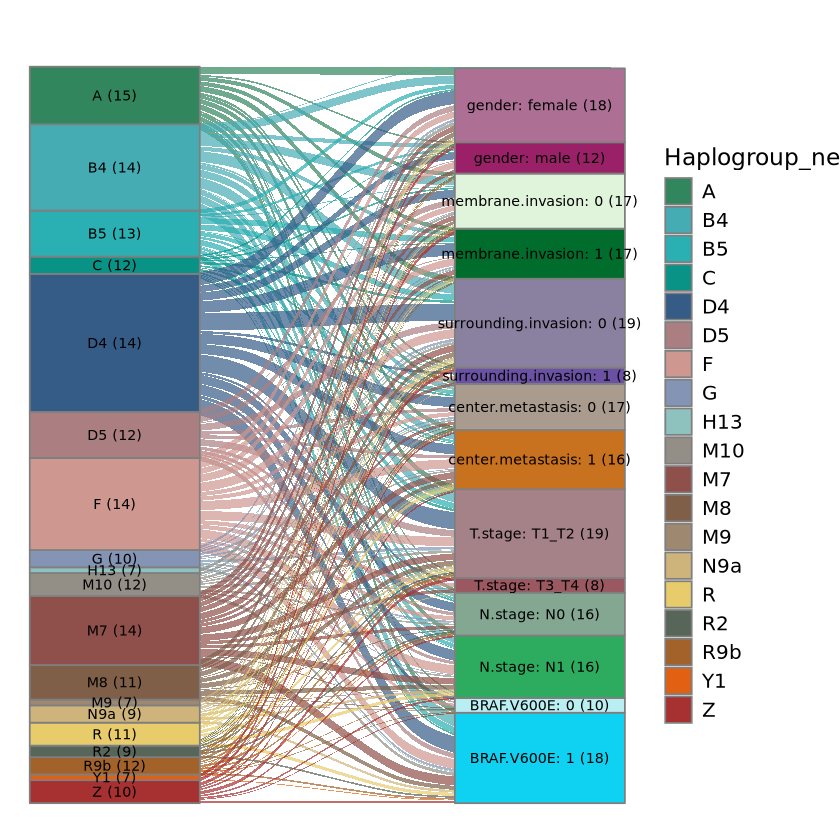

In [ ]:

p_cat <- ggplot(sankey_cat,
                aes(axis1 = Haplogroup_new, axis2 = node_label, y = n)) +
  geom_alluvium(aes(fill = Haplogroup_new), alpha = 0.7) +
  geom_stratum(aes(fill = after_stat(stratum)), color = "grey50", width = 0.4) + 
  geom_text(stat = "stratum", 
            aes(label = paste(after_stat(stratum), " (", n, ")", sep = "")), 
            size = 3) +  
  scale_fill_manual(values = all_colors_cat,
                    breaks = names(hap_colors),  
                    guide = guide_legend(order = 1)) +
  theme_void() +
  theme(legend.position = "right",
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14),  
        plot.title = element_text(hjust = 0.5)) +
  labs(title = "")

print(p_cat)

In [60]:
df_new=df[,-c(4,7)]

In [ ]:
library(dplyr)

df_new$Haplogroup_new <- as.factor(df_new$Haplogroup_new)

haplogroups <- levels(df_new$Haplogroup_new)
variables <- names(df_new)[-1]

res_list <- list()

hap_col_chr <- as.character(df_new$Haplogroup_new)

for (hap in haplogroups) {
  hap_chr <- as.character(hap)
  
  for (var in variables) {
    col_vals <- df_new[[var]]
    
    if (!is.atomic(col_vals)) {
      message("Skipping non-atomic column: ", var)
      next
    }
    
    col_chr <- as.character(col_vals)
    
    unique_vals <- unique(col_vals)
    unique_vals <- unique_vals[!is.na(unique_vals)]
    if (length(unique_vals) == 0) next
    
    for (val in unique_vals) {
      val_chr <- as.character(val)

      message("hap=", hap_chr, " | var=", var, " | val=", val_chr)
      
      hap_idx <- !is.na(hap_col_chr) & hap_col_chr == hap_chr
      val_idx <- !is.na(col_chr) & col_chr == val_chr

      complete_idx <- !is.na(hap_col_chr) & !is.na(col_chr)
      
      k <- sum(hap_idx & val_idx, na.rm = TRUE)   
      N <- sum(hap_idx, na.rm = TRUE)            
      n <- sum(val_idx, na.rm = TRUE)              
      M <- sum(complete_idx, na.rm = TRUE)        
      
      p_value <- NA_real_
      
      if (N > 0 && n > 0 && M > 0 && all(c(k, N, n, M - n) >= 0) && k <= min(N, n)) {
        tmp <- tryCatch(
          phyper(k - 1, n, M - n, N, lower.tail = FALSE),
          error = function(e) NA_real_
        )
        p_value <- ifelse(length(tmp) == 1, tmp, NA_real_)
      }
      
      res_list[[length(res_list) + 1]] <- data.frame(
        Haplogroup_new = hap_chr,
        Variable       = var,
        Value          = val_chr,
        P_Value        = p_value,
        stringsAsFactors = FALSE
      )
    }
  }
}

p_values <- do.call(rbind, res_list)



hap=A | var=gender | val=male

hap=A | var=gender | val=female

hap=A | var=age | val=[39, 50]

hap=A | var=age | val=[18, 30]

hap=A | var=age | val=[30, 39]

hap=A | var=age | val=[50, 79]

hap=A | var=membrane.invasion | val=1

hap=A | var=membrane.invasion | val=0

hap=A | var=surrounding.invasion | val=0

hap=A | var=surrounding.invasion | val=1

hap=A | var=center.metastasis | val=0

hap=A | var=center.metastasis | val=1

hap=A | var=T.stage | val=T1_T2

hap=A | var=T.stage | val=T3_T4

hap=A | var=T.stage | val=

hap=A | var=N.stage | val=N0

hap=A | var=N.stage | val=N1

hap=A | var=BRAF.V600E | val=1

hap=A | var=BRAF.V600E | val=0

hap=A | var=tumor_diameter | val=[1, 1.3]

hap=A | var=tumor_diameter | val=[1.8, 8.8]

hap=A | var=tumor_diameter | val=[0.5, 1]

hap=A | var=tumor_diameter | val=[1.3, 1.8]

hap=A | var=center_lymph | val=[0, 1]

hap=A | var=center_lymph | val=[3, 6]

hap=A | var=center_lymph | val=[6, 17]

hap=A | var=center_lymph | val=[1, 3]

hap=B4 | var=gend

Haplogroup_new,Variable,Value,P_Value
<chr>,<chr>,<chr>,<dbl>
A,gender,male,0.8564744
A,gender,female,0.3837475
A,age,"[39, 50]",0.4530133
A,age,"[18, 30]",0.5254315
A,age,"[30, 39]",1.0000000
A,age,"[50, 79]",0.1984625
A,membrane.invasion,1,0.5672412
A,membrane.invasion,0,0.6860351
A,surrounding.invasion,0,0.9505229
